In [2]:
% matplotlib inline
import datetime
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("Iowa_Liquor_sales_sample_10pct.csv")
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
df['Category Name'].nunique()

71

# Clean Data

In [5]:
del df['Item Description']
del df['Category Name']
del df['Volume Sold (Gallons)']

df.head()


#df.drop(axis=1, labels=['Item Description','Category Name','Item Description'])

,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,55,54436,750,$4.50,$6.75,12,$81.00,9.0
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,395,27605,750,$13.75,$20.63,2,$41.26,1.5
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,65,19067,1000,$12.59,$18.89,24,$453.36,24.0
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,395,59154,1750,$9.50,$14.25,6,$85.50,10.5
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,297,35918,1750,$7.20,$10.80,12,$129.60,21.0


In [6]:
df.dtypes

Date                     object
Store Number              int64
City                     object
Zip Code                 object
County Number           float64
County                   object
Category                float64
Vendor Number             int64
Item Number               int64
Bottle Volume (ml)        int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold              int64
Sale (Dollars)           object
Volume Sold (Liters)    float64
dtype: object

In [7]:
"""
def dollars_to_float(x):
    if type(x) != type(''):
        return x
    if x[0] == '$':
        x = x[1:]
    return float(x)

df['State_Bottle_Cost'] = df['State Bottle Cost'].map(dollar_to_float)
......
"""
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col] = df[col].apply(lambda x: float(x[1:]))
df.dtypes

Date                     object
Store Number              int64
City                     object
Zip Code                 object
County Number           float64
County                   object
Category                float64
Vendor Number             int64
Item Number               int64
Bottle Volume (ml)        int64
State Bottle Cost       float64
State Bottle Retail     float64
Bottles Sold              int64
Sale (Dollars)          float64
Volume Sold (Liters)    float64
dtype: object

In [8]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,55,54436,750,4.50,6.75,12,81.00,9.0
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,395,27605,750,13.75,20.63,2,41.26,1.5
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,65,19067,1000,12.59,18.89,24,453.36,24.0
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,395,59154,1750,9.50,14.25,6,85.50,10.5
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,297,35918,1750,7.20,10.80,12,129.60,21.0


In [9]:
df.isnull().any()

Date                    False
Store Number            False
City                    False
Zip Code                False
County Number            True
County                   True
Category                 True
Vendor Number           False
Item Number             False
Bottle Volume (ml)      False
State Bottle Cost       False
State Bottle Retail     False
Bottles Sold            False
Sale (Dollars)          False
Volume Sold (Liters)    False
dtype: bool

In [10]:
df.Category.isnull().value_counts()

False    270887
True         68
Name: Category, dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().any()

Date                    False
Store Number            False
City                    False
Zip Code                False
County Number           False
County                  False
Category                False
Vendor Number           False
Item Number             False
Bottle Volume (ml)      False
State Bottle Cost       False
State Bottle Retail     False
Bottles Sold            False
Sale (Dollars)          False
Volume Sold (Liters)    False
dtype: bool

In [12]:
df["County Number"] = df["County Number"].apply(lambda x: int(x))
df["Category"] = df["Category"].apply(lambda x: int(x))
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,55,54436,750,4.50,6.75,12,81.00,9.0
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,395,27605,750,13.75,20.63,2,41.26,1.5
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0
3,2016-02-03,2501,AMES,50010,85,Story,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0


# Filter the Data

In [13]:
dates = df.groupby(["Store Number"], as_index = False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.head()


Store Number       Date           
                     amin       amax
0         2106 2015-01-08 2016-03-31
1         2113 2015-01-07 2016-03-23
2         2130 2015-01-08 2016-03-31
3         2152 2015-01-08 2016-02-25
4         2178 2015-01-07 2016-03-30

In [14]:
opened_early = datetime.datetime(2015,1,15)
opened_late = datetime.datetime(2015,12,15)
mask = (dates['Date', 'amin'] < opened_early) & (dates['Date', 'amax'] > opened_late)
good_stores = dates[mask]["Store Number"]
df = df[df["Store Number"].isin(good_stores)]
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,55,54436,750,4.50,6.75,12,81.00,9.0
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,395,27605,750,13.75,20.63,2,41.26,1.5
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0
3,2016-02-03,2501,AMES,50010,85,Story,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0


# Compute New Columns and Tables

In [15]:
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
df['Price per bottle'] = df["Sale (Dollars)"] / df["Volume Sold (Liters)"]
df["Price per Liter"] = df["Sale (Dollars)"] / df["Bottles Sold"]
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Margin,Price per bottle,Price per Liter
0,2015-11-04,3717,SUMNER,50674,9,Bremer,1051100,55,54436,750,4.50,6.75,12,81.00,9.0,27.00,9.000000,6.75
1,2016-03-02,2614,DAVENPORT,52807,82,Scott,1011100,395,27605,750,13.75,20.63,2,41.26,1.5,13.76,27.506667,20.63
2,2016-02-11,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,65,19067,1000,12.59,18.89,24,453.36,24.0,151.20,18.890000,18.89
3,2016-02-03,2501,AMES,50010,85,Story,1071100,395,59154,1750,9.50,14.25,6,85.50,10.5,28.50,8.142857,14.25
4,2015-08-18,3654,BELMOND,50421,99,Wright,1031080,297,35918,1750,7.20,10.80,12,129.60,21.0,43.20,6.171429,10.80


In [16]:
# Sales 2015
import numpy as np
df.sort(['Date'],ascending=True, inplace = True)
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2015,12,31)
sales = df[(df['Date']>=start_date)&(df['Date']<=end_date)].pivot_table(
    index=['Store Number'],
    values=["Sale (Dollars)", 'Volume Sold (Liters)','Margin','Price per Liter'],
aggfunc = {"Sale (Dollars)":[sum,np.mean],
         'Volume Sold (Liters)': [sum,np.mean],
         'Margin': np.mean,
         'Price per Liter': np.mean })
#aggfunc = {'Sale (Dollars)': {'TotalDollars': sum, 'Average':np.mean}}
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
sales.columns = [u"2015 Price per Liter mean",u"2015 Margin mean",u"2015 Sale (Dollars) mean",
                "2015 Sale (Dollars) sum",u"2015 Volume Sold (Liters) mean",u"2015 Volume Sold (Liters) sum"]
sales.head()

/Users/tianjiaoxie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum
Store Number,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12


In [17]:
"""
import numpy as np
df.sort(['Date'],ascending=True, inplace = True)
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2015,12,31)
sales = df[(df['Date']>=start_date)&(df['Date']<=end_date)].pivot_table(
    index=['Store Number'],
    values=["Sale (Dollars)", 'Volume Sold (Liters)','Margin','Price per bottle','Price per Liter'],
aggfunc = {"Sale (Dollars)":[sum,np.mean],
         'Volume Sold (Liters)': sum,
         'Margin': [sum,np.mean]
         'Price per bottle': np.mean,
         'Price per Liter': np.mean })
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
sales.columns = [u'Price per bottle mean', u"Price per Liter mean",u"Margin sum",u"2015 Sale (Dollars) mean",
                "2015 Sale (Dollars) sum",u"Volume Sold (Liters) sum"]
sales.head()
"""

'\nimport numpy as np\ndf.sort([\'Date\'],ascending=True, inplace = True)\nstart_date = datetime.datetime(2015,1,1)\nend_date = datetime.datetime(2015,12,31)\nsales = df[(df[\'Date\']>=start_date)&(df[\'Date\']<=end_date)].pivot_table(\n    index=[\'Store Number\'],\n    values=["Sale (Dollars)", \'Volume Sold (Liters)\',\'Margin\',\'Price per bottle\',\'Price per Liter\'],\naggfunc = {"Sale (Dollars)":[sum,np.mean],\n         \'Volume Sold (Liters)\': sum,\n         \'Margin\': [sum,np.mean]\n         \'Price per bottle\': np.mean,\n         \'Price per Liter\': np.mean })\nsales.columns = [\' \'.join(col).strip() for col in sales.columns.values]\nsales.columns = [u\'Price per bottle mean\', u"Price per Liter mean",u"Margin sum",u"2015 Sale (Dollars) mean",\n                "2015 Sale (Dollars) sum",u"Volume Sold (Liters) sum"]\nsales.head()\n'

In [18]:
# Sales 2015  Q1
start_date = pd.Timestamp('20150101')
end_date = pd.Timestamp('20150331')
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales_2015_q1 = df[mask].pivot_table(index = ['Store Number'], values = ['Sale (Dollars)'],aggfunc = sum)
sales_2015_q1['2015 Sales Q1'] = sales_2015_q1['Sale (Dollars)']
del sales_2015_q1['Sale (Dollars)']
sales_2015_q1

,2015 Sales Q1
Store Number,
2106,39287.29
2113,2833.25
2130,24272.57
2152,2003.46
2178,5856.41
2190,29452.92
2191,29085.57
2200,4900.43
2205,6407.74


In [19]:
# Sales 2016 Q1
start_date = pd.Timestamp('20160101')
end_date = pd.Timestamp('20160331')
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales_2016_q1 = df[mask].pivot_table(index = ['Store Number'], values = ['Sale (Dollars)'],aggfunc = sum)
sales_2016_q1['2016 Sales Q1'] = sales_2016_q1['Sale (Dollars)']
del sales_2016_q1['Sale (Dollars)']
sales_2016_q1

,2016 Sales Q1
Store Number,
2106,30523.75
2113,2065.90
2130,27856.11
2152,904.66
2178,5588.50
2190,34515.69
2191,47338.20
2200,4174.87
2228,3086.38


In [20]:
extended = sales.merge(sales_2015_q1, left_index=True, right_index=True)
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1
Store Number,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41


In [21]:
extended = extended.merge(sales_2016_q1, left_index=True, right_index=True, how = 'right')

In [22]:
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
Store Number,,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29,30523.75
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25,2065.90
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57,27856.11
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46,904.66
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41,5588.50


In [23]:
q1_sales = extended[['2015 Sales Q1','2016 Sales Q1']]
q1_sales.head()

,2015 Sales Q1,2016 Sales Q1
Store Number,,
2106,39287.29,30523.75
2113,2833.25,2065.90
2130,24272.57,27856.11
2152,2003.46,904.66
2178,5856.41,5588.50


(0, 50000)

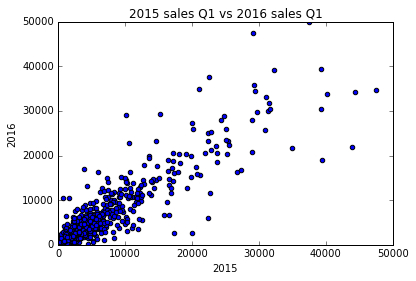

In [24]:
import matplotlib.pyplot as plt
q1_sales.plot.scatter('2015 Sales Q1','2016 Sales Q1')
plt.title('2015 sales Q1 vs 2016 sales Q1')
plt.xlabel('2015')
plt.ylabel('2016')
plt.xlim(0,50000)
plt.ylim(0,50000)

In [25]:
import sklearn.grid_search
import sklearn.linear_model
from sklearn.cross_validation import train_test_split
import sklearn.tree
import seaborn

# Ransac Regressor （2015 q1 sales vs 2016 q1 sales）

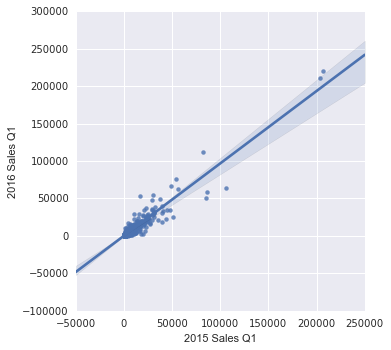

In [26]:
seaborn.pairplot(q1_sales,x_vars=['2015 Sales Q1'], y_vars='2016 Sales Q1',size = 5,kind='reg')

In [27]:
X = q1_sales[['2015 Sales Q1']]
y = q1_sales['2016 Sales Q1']

In [28]:
(X_train,X_test,y_train,y_test)= train_test_split(X, y)

In [29]:
len(X_train),len(X_test)

(691, 231)

In [30]:
len(y_train),len(y_test)

(691, 231)

In [31]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(X_train,y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [32]:
ransac.score(X_test,y_test) #Test model

0.7982833445678047

In [33]:
ransac.estimator_.coef_

array([ 0.77730691])

In [34]:
ransac.estimator_.intercept_

419.43983059272114

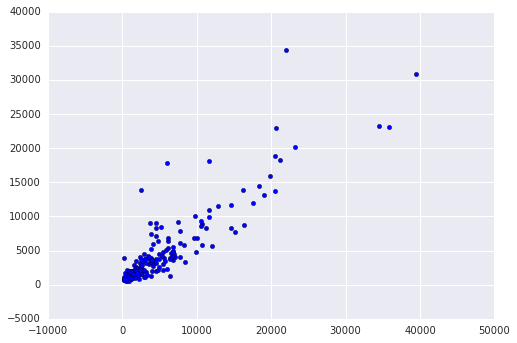

In [35]:
predictions = ransac.predict(X_test)
plt.scatter(y_test,predictions)

In [36]:
sklearn.metrics.r2_score(y_test, predictions)

0.7982833445678047

In [37]:
ransac.predict(20000)

array([ 15965.57809847])

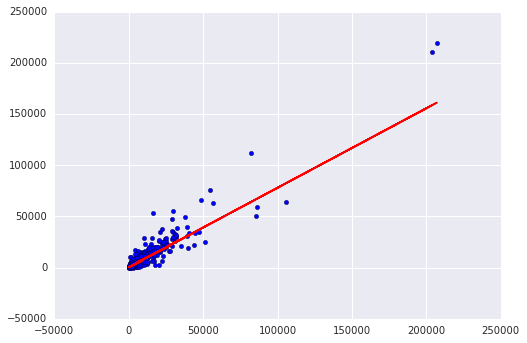

In [38]:
predictions = ransac.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions,color = 'red')

In [39]:
sklearn.metrics.r2_score(y, predictions)

0.86316638648515398

Grid search

In [40]:
import sklearn.grid_search
params = { 'residual_threshold': [None, 50, 80, 100, 110,150,160,170,180,200],
         'max_trials': [150,200]}
ransac = sklearn.linear_model.RANSACRegressor()
searcher = sklearn.grid_search.GridSearchCV(ransac, params, cv=10)
searcher.fit(X,y)
searcher.best_estimator_

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=150, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=180, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [41]:
searcher.best_estimator_.estimator_.coef_

array([ 0.78084911])

In [42]:
searcher.best_estimator_.estimator_.intercept_

234.60304089198348

In [43]:
searcher.best_score_

0.74156933237467171

In [44]:
searcher.best_params_

{'max_trials': 150, 'residual_threshold': 180}

In [45]:
searcher.grid_scores_

[mean: 0.72149, std: 0.16158, params: {'max_trials': 150, 'residual_threshold': None},
 mean: 0.68123, std: 0.08746, params: {'max_trials': 150, 'residual_threshold': 50},
 mean: 0.69709, std: 0.15597, params: {'max_trials': 150, 'residual_threshold': 80},
 mean: 0.71325, std: 0.14088, params: {'max_trials': 150, 'residual_threshold': 100},
 mean: 0.70282, std: 0.12320, params: {'max_trials': 150, 'residual_threshold': 110},
 mean: 0.73057, std: 0.12665, params: {'max_trials': 150, 'residual_threshold': 150},
 mean: 0.72678, std: 0.12044, params: {'max_trials': 150, 'residual_threshold': 160},
 mean: 0.72885, std: 0.15562, params: {'max_trials': 150, 'residual_threshold': 170},
 mean: 0.74157, std: 0.13081, params: {'max_trials': 150, 'residual_threshold': 180},
 mean: 0.71080, std: 0.13926, params: {'max_trials': 150, 'residual_threshold': 200},
 mean: 0.73148, std: 0.12658, params: {'max_trials': 200, 'residual_threshold': None},
 mean: 0.71602, std: 0.12343, params: {'max_trials': 2

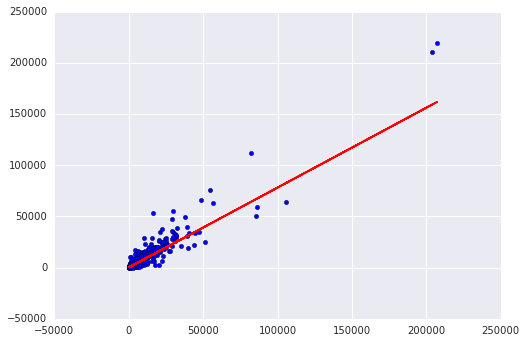

In [46]:
predictions = searcher.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions, color = 'red')

In [47]:
sklearn.metrics.r2_score(y, predictions)

0.86259009011420318

# Linear Regression （2015 q1 sales vs 2016 q1 sales）

In [48]:
X = q1_sales[['2015 Sales Q1']]
y = q1_sales['2016 Sales Q1']

In [49]:
(X_train,X_test,y_train,y_test) = train_test_split(X, y)

In [50]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lr.coef_

array([ 0.94830849])

In [52]:
lr.intercept_

354.39541462399939

In [53]:
lr.score(X_test,y_test)

0.93312814610232298

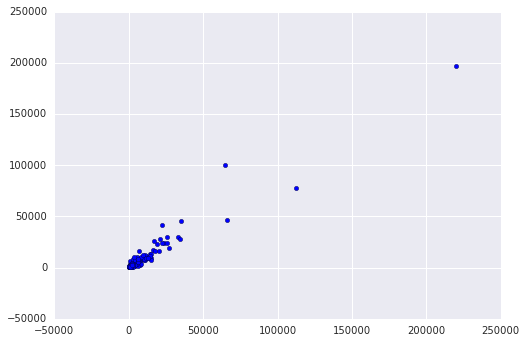

In [54]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

In [55]:
sklearn.metrics.r2_score(y_test, predictions)

0.93312814610232298

In [56]:
lr.predict(20000)

array([ 19320.56528473])

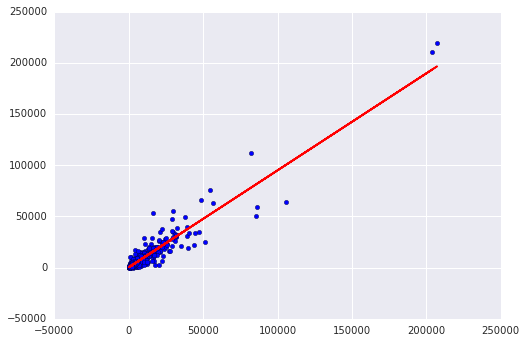

In [57]:
predictions = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions, color = 'red')

In [58]:
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
Store Number,,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29,30523.75
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25,2065.90
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57,27856.11
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46,904.66
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41,5588.50


In [59]:
extended.corr()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
2015 Price per Liter mean,1.000000,0.417521,0.418044,0.310638,0.319026,0.301119,0.299536,0.287601
2015 Margin mean,0.417521,1.000000,0.999978,0.437854,0.924218,0.433117,0.408622,0.385464
2015 Sale (Dollars) mean,0.418044,0.999978,1.000000,0.438415,0.922986,0.433431,0.409025,0.386019
2015 Sale (Dollars) sum,0.310638,0.437854,0.438415,1.000000,0.423704,0.992299,0.983550,0.967366
2015 Volume Sold (Liters) mean,0.319026,0.924218,0.922986,0.423704,1.000000,0.447319,0.399477,0.372595
2015 Volume Sold (Liters) sum,0.301119,0.433117,0.433431,0.992299,0.447319,1.000000,0.974713,0.954312
2015 Sales Q1,0.299536,0.408622,0.409025,0.983550,0.399477,0.974713,1.000000,0.950121
2016 Sales Q1,0.287601,0.385464,0.386019,0.967366,0.372595,0.954312,0.950121,1.000000


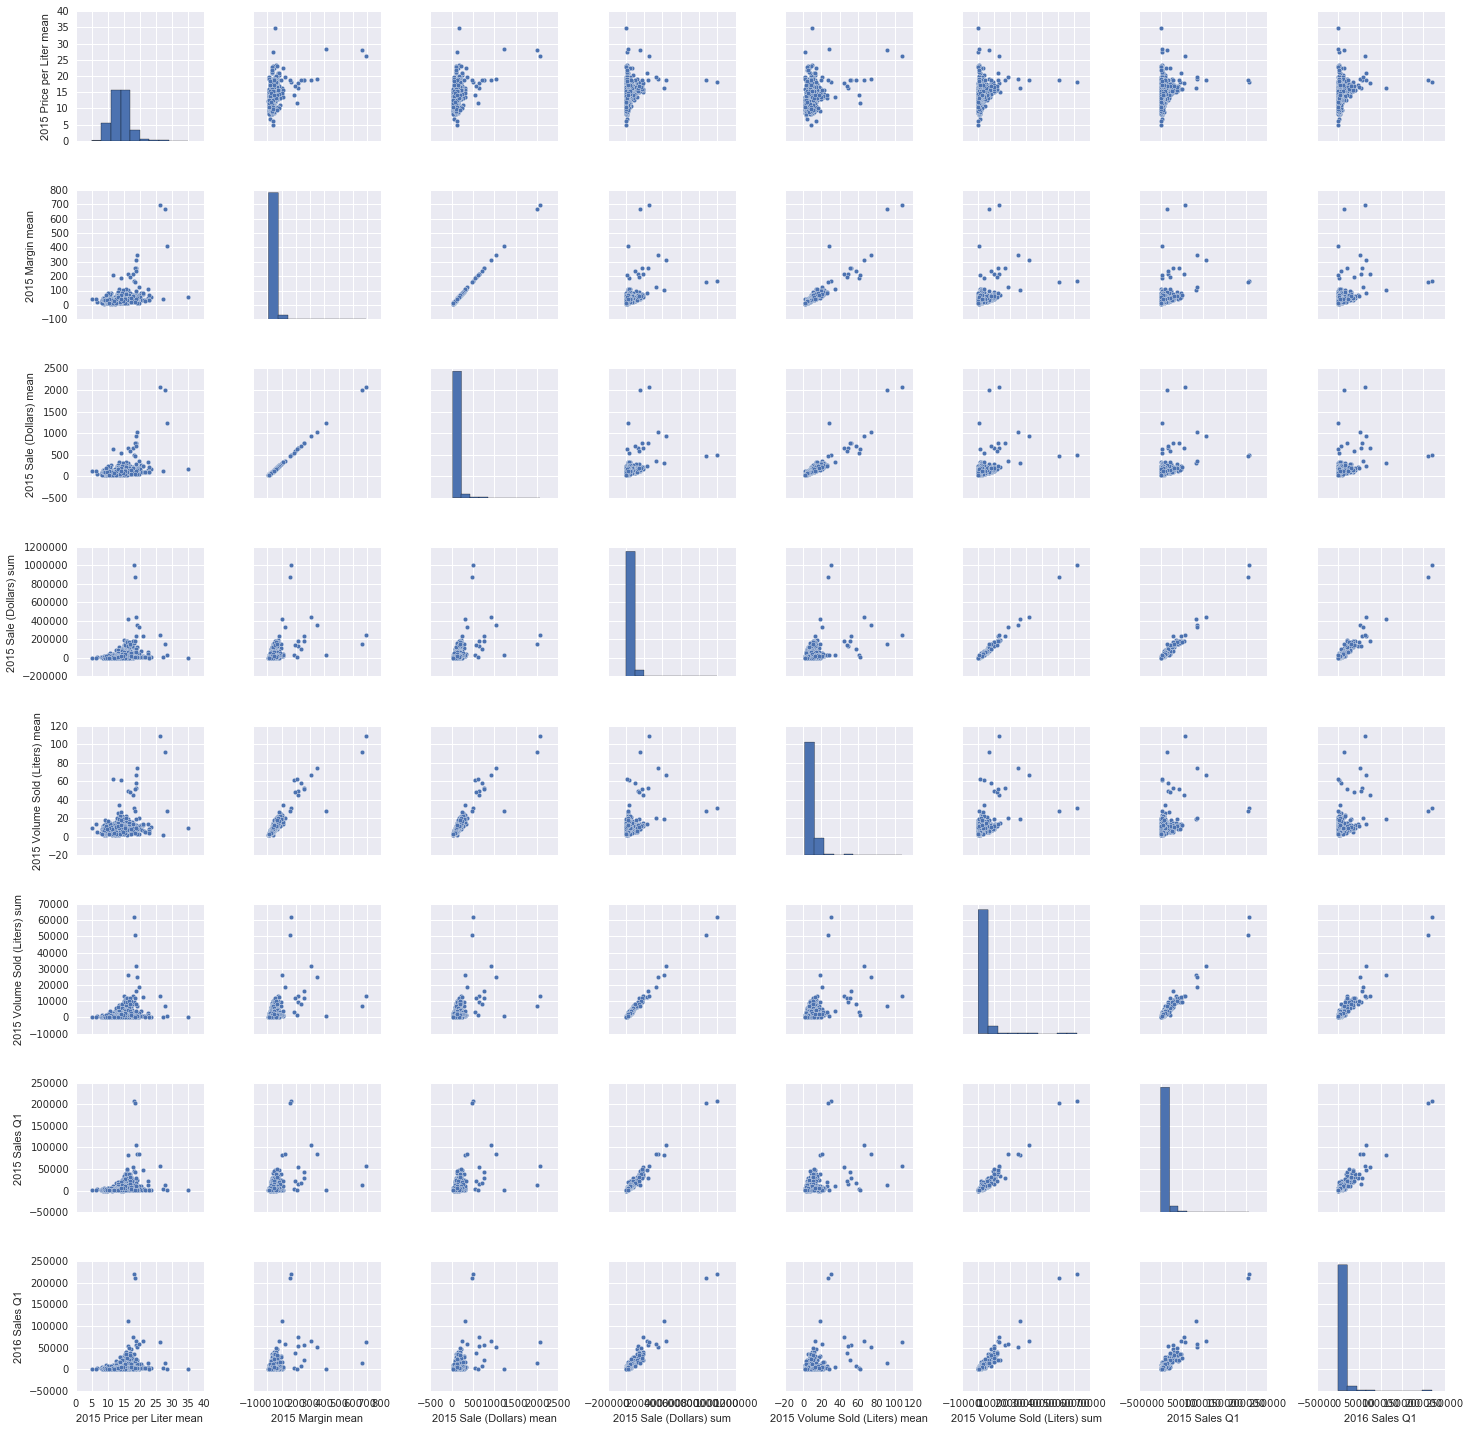

In [60]:
seaborn.pairplot(extended)

#  2015 Sales Q1 vs 2015 Sales sum

In [61]:
X = extended[['2015 Sales Q1']]
y = extended['2015 Sale (Dollars) sum']

In [62]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y)

In [63]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(X_train,y_train)
lr.coef_,lr.intercept_

(array([ 4.48678512]), 488.2203709870264)

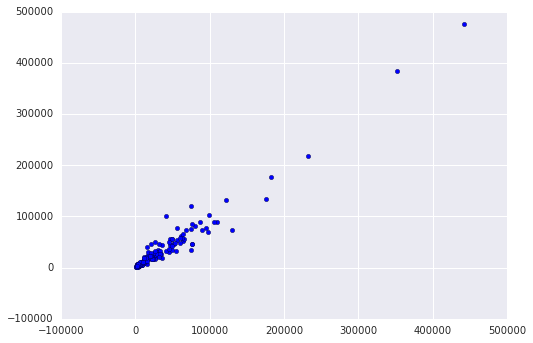

In [64]:
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)

In [65]:
sklearn.metrics.r2_score(y_test,predictions)

0.951346569236038

(0, 400000)

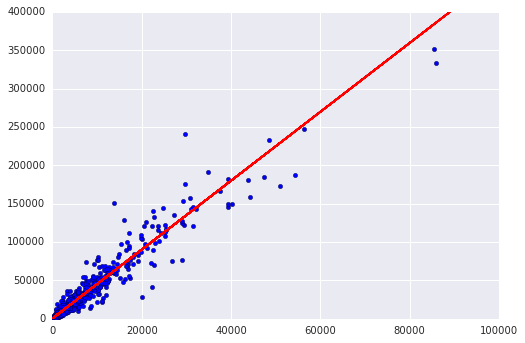

In [66]:
predictions = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions,color = 'red')
plt.xlim(0, 100000)
plt.ylim(0, 400000)

# 2016 sales prediction

In [67]:
X = extended[["2016 Sales Q1"]]
predictions = lr.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(extended["2015 Sale (Dollars) sum"])
X2 = extended[["2015 Sales Q1"]]
pred_2015 = sum(lr.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016

2015 predicted 25723467.3511
2015 actual 25786753.63
2016 predicted 25740485.054


In [68]:
extended.head()

,2015 Price per Liter mean,2015 Margin mean,2015 Sale (Dollars) mean,2015 Sale (Dollars) sum,2015 Volume Sold (Liters) mean,2015 Volume Sold (Liters) sum,2015 Sales Q1,2016 Sales Q1
Store Number,,,,,,,,
2106,15.475863,92.671879,277.658861,146326.22,18.466509,9731.85,39287.29,30523.75
2113,16.315646,21.149932,63.334830,9310.22,4.488776,659.85,2833.25,2065.90
2130,14.764286,95.217347,285.386301,111871.43,17.580026,6891.37,24272.57,27856.11
2152,12.887660,18.351277,54.759433,7721.08,4.491986,633.37,2003.46,904.66
2178,14.558692,34.454430,102.633671,24324.18,8.089114,1917.12,5856.41,5588.50


# Price per liter mean vs Volume sold mean

(0, 20)

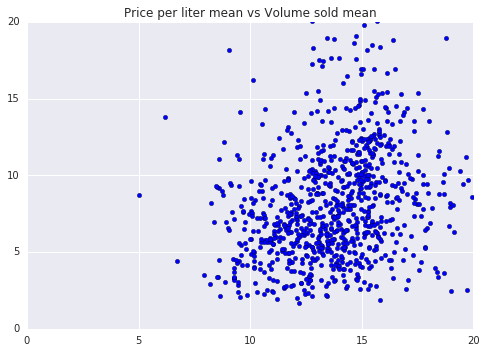

In [69]:
plt.scatter(extended['2015 Price per Liter mean'],extended['2015 Volume Sold (Liters) mean'])
plt.title('Price per liter mean vs Volume sold mean')
plt.xlim(0,20)
plt.ylim(0,20)

In [70]:
import sklearn.tree
X = extended[['2015 Price per Liter mean']]
y = extended['2015 Volume Sold (Liters) mean']
(X_train,X_test,y_train,y_test) = train_test_split(X,y)
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

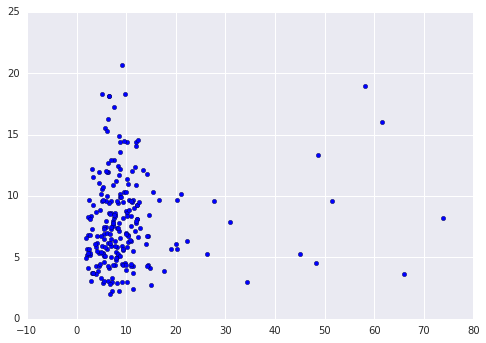

In [71]:
predictions = tree.predict(X_test)
plt.scatter(y_test, predictions)

Grid Search

In [72]:
#sklearn.tree.DecisionTreeRegressor? max_depth=None ,max_features=None, min_samples_split=2, 'min_samples_split': [2,4,6,8,10]

In [73]:
import sklearn.grid_search
params = { 'max_depth': range(1,10),
         'max_features': [None,1],
         'min_samples_split': [2,4,6,8,10]}
tree = sklearn.tree.DecisionTreeRegressor()
searcher = sklearn.grid_search.GridSearchCV(tree, params, cv=10)
searcher.fit(X,y)
searcher.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [74]:
searcher.best_params_

{'max_depth': 3, 'max_features': None, 'min_samples_split': 4}

In [75]:
searcher.best_score_

-0.064362410568560652

# 2015 Volume Sold (Liters) sum vs 2016 Sales Q1

In [76]:
X = extended[['2015 Volume Sold (Liters) sum']]
y = extended['2016 Sales Q1']

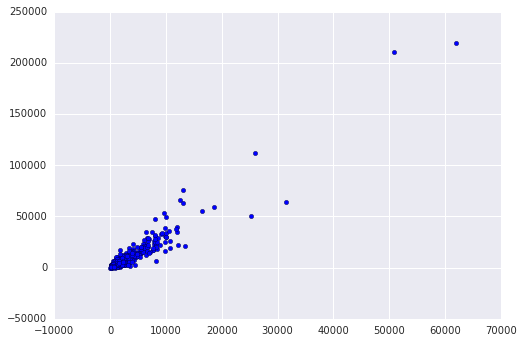

In [77]:
plt.scatter(X,y)

In [78]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y)
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(X_train,y_train)
ransac.estimator_.coef_,ransac.estimator_.intercept_

(array([ 2.57299753]), 274.53872511796544)

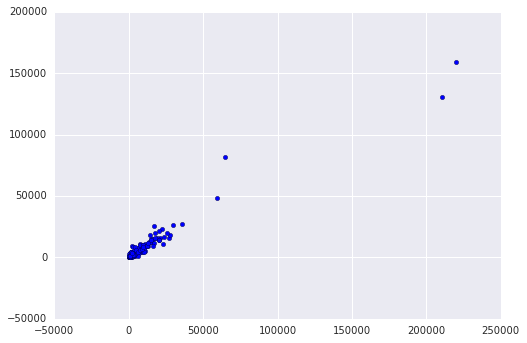

In [79]:
predictions = ransac.predict(X_test)
plt.scatter(y_test,predictions)

In [80]:
ransac.score(X_test,y_test)

0.8864144161615064

In [81]:
sklearn.metrics.r2_score(y_test,predictions)

0.8864144161615064

In [82]:
# This is wrong, because it is scoring the wrong way around,
# but it will be similar 
sklearn.metrics.r2_score(predictions, y_test)

0.7817933696618391

We can do better than a test/train split,  by doing cross validation.

In [83]:
from sklearn.cross_validation import cross_val_score
X = extended[['2015 Volume Sold (Liters) sum']]
y = extended[['2016 Sales Q1']]
ransac = sklearn.linear_model.RANSACRegressor()
cross_val_score(ransac, X, y, cv=10)



array([ 0.81521921,  0.91494927,  0.73762861,  0.83733128,  0.5975733 ,
        0.6674442 ,  0.77749641,  0.72945068,  0.90190249,  0.7487311 ])

If we had some intermediate steps that meant that the previous cell wasn't an option,
then we can do a manual KFold.

In [84]:
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score
X = extended[['2015 Volume Sold (Liters) sum']]
y = extended[['2016 Sales Q1']]
Number_of_rows = len(extended)
for fold in KFold(Number_of_rows, n_folds=10):
    train_fold = fold[0]
    test_fold = fold[1]
    X_fold = X.iloc[train_fold]
    y_fold = y.iloc[train_fold]
    #.......
    ransac = sklearn.linear_model.RANSACRegressor()
    ransac.fit(X_fold, y_fold)
    predictions = ransac.predict(X.iloc[test_fold])
    print r2_score(y.iloc[test_fold], predictions)


0.725990357187
0.908966293124
0.735517279932
0.831792853196
0.585535850486
0.659083473742
0.773629509069
0.775466411839
0.909856559847
0.697345158605


In reality, we just do GridSearch

老师说：“GridSearch  很好”。

In [85]:
import sklearn.grid_search
params = { 'residual_threshold': [None, 0.1, 1.0, 10.0, 20, 30, 40, 50],
         'max_trials': [150,200]}
ransac = sklearn.linear_model.RANSACRegressor()
searcher = sklearn.grid_search.GridSearchCV(ransac, params, cv=10)
searcher.fit(X,y)
searcher.best_estimator_

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=200, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=10.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [86]:
searcher.best_estimator_.estimator_.coef_

array([[ 1.64657389]])

In [87]:
searcher.best_estimator_.estimator_.intercept_

array([ 553.41728121])

In [88]:
searcher.best_score_

0.78008093715664473

In [89]:
searcher.best_params_

{'max_trials': 200, 'residual_threshold': 10.0}

In [90]:
searcher.grid_scores_

[mean: 0.74501, std: 0.10410, params: {'max_trials': 150, 'residual_threshold': None},
 mean: 0.71992, std: 0.11096, params: {'max_trials': 150, 'residual_threshold': 0.1},
 mean: 0.76407, std: 0.09374, params: {'max_trials': 150, 'residual_threshold': 1.0},
 mean: 0.72825, std: 0.07561, params: {'max_trials': 150, 'residual_threshold': 10.0},
 mean: 0.73218, std: 0.11987, params: {'max_trials': 150, 'residual_threshold': 20},
 mean: 0.73229, std: 0.13050, params: {'max_trials': 150, 'residual_threshold': 30},
 mean: 0.68797, std: 0.10906, params: {'max_trials': 150, 'residual_threshold': 40},
 mean: 0.73514, std: 0.11922, params: {'max_trials': 150, 'residual_threshold': 50},
 mean: 0.74812, std: 0.07836, params: {'max_trials': 200, 'residual_threshold': None},
 mean: 0.52765, std: 0.74817, params: {'max_trials': 200, 'residual_threshold': 0.1},
 mean: 0.67892, std: 0.10303, params: {'max_trials': 200, 'residual_threshold': 1.0},
 mean: 0.78008, std: 0.09142, params: {'max_trials': 20

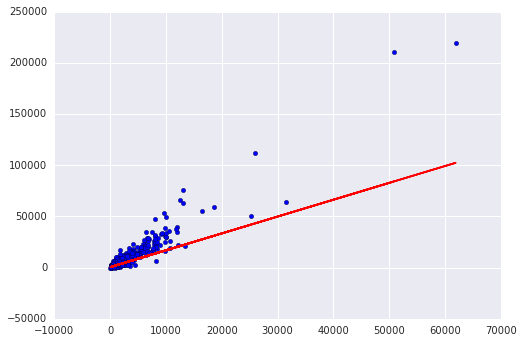

In [91]:
predictions = searcher.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions, color = 'red')